<h1><center>DBSCAN: A macroscopic investigation in Python</center></h1><br>
Cluster analysis is an important problem in data analysis. Data scientists use clustering to identify malfunctioning servers, group genes with similar expression patterns, or various other applications.

Briefly, clustering is the task of grouping together a set of objects in a way that objects in the same cluster are more similar to each other than to objects in other clusters. Similarity is an amount that reflects the strength of a relationship between two data objects. Clustering is mainly used for exploratory data mining. Clustering has manifold usage in many fields such as machine learning, pattern recognition, image analysis, information retrieval, bio-informatics, data compression, and computer graphics.

There are many families of  clustering techniques, and you may be familiar with the most popular one: K-Means (which belongs to the *family of centroid-based clustering*). As a quick refresher, K-Means determines k centroids in the data and clusters points by assigning them to the nearest centroid.

While K-Means is easy to understand and implement in practice, the algorithm does not take care of outliers, so all points are assigned to a cluster even if they do not belong in any. In the domain of anomaly detection, this causes problems as anomalous points will be assigned to the same cluster as “normal” data points. The anomalous points pull the cluster centroid towards them, making it harder to classify them as anomalous points.

This tutorial will cover another type of clustering technique known as density-based clustering specifically DBSCAN (a density-based based clustering technique). Compared to centroid-based clustering like K-Means, density-based clustering works by identifying “dense” clusters of points, allowing it to learn clusters of arbitrary shape and identify outliers in the data. 

<h2>In this post you will get to know about:</h2>
* Disadvantage of centroid-based clustering technique
* General introduction to density-based clustering technique
* Inner workings of DBSCAN
* A simple case study of DBSCAN in Python
* Applications of DBSCAN


<h3>Disadvantage of centroid-based clustering technique: </h3>
Before discussing the disadvantage of centroid-based clustering, let me give a brief introduction to it. A centroid is a data point (imaginary or real) at the center of a cluster. In centroid-based clustering, clusters are represented by a central vector or a centroid. This centroid might not necessarily be a member of the dataset. Centroid-based clustering is an iterative clustering algorithm in which the notion of similarity is derived by how close a data point is to the centroid of the cluster. <br><br>
Sometimes a dataset can contain extreme values that are outside the range of what is expected and unlike the other data. These are called outliers. More formally, an outlier is an observation that lies an abnormal distance from other values in a random sample from a population.
The main fundamental of centroid-based clustering techniques is driven by distance measurements between the data points and centroids. Therefore, centroid-based clustering techniques generally fail to identify the data points that deviate from the normal distribution of the data to a great extent. Even before predictive models are prepared on data, outliers can result in misleading representations and in turn misleading interpretations of collected data. This is essentially not desirable for building efficient predictive and analytical models from data. <br><br>
You can consider the following two taller bars (than rest of the bars) as outliers in that particular data:
<center>
![Bar Graph](https://tomhopper.files.wordpress.com/2010/08/bar-chart-natural-axis-secondary-axis1.png) 
</center>

<h3>General introduction to density-based clustering technique:</h3>
Before discussing density-based clustering, you first need to cover a topic : ɛ-neighborhoods.

The general idea behind ɛ-neighborhoods is given a data point, you want to be able to reason about the data points in the space around it. Formally, for some real-valued ɛ > 0 and some point p, the ɛ-neighborhood of p is defined as the set of points that are at most distance ɛ away from p.

If you think back to geometry, the shape in which all points are equidistant from the center is the circle. In 2D space, the ɛ-neighborhood of a point p is the set of points contained in a circle of radius ɛ, centered at p. In 3D space, the ɛ-neighborhood is a sphere of radius ɛ, centered at p, and in higher dimensional space, the ɛ-neighborhood is just the [N-sphere](https://en.wikipedia.org/wiki/N-sphere) of radius ɛ, centered at p.

Let’s consider an example to make this idea more concrete.
In the image below 100 data points are scattered in the interval [1,3]X[2,4]. Let’s pick the point (3,2) to be our point p.

<center>
![Scatter Plot 1](https://goo.gl/VPRZmS) 
</center>

First, let’s consider the neighborhood of p with radius 0.5 (ɛ = 0.5), the set of points that are distance 0.5 away from p.

<center>
![Scatter Plot 2](https://goo.gl/wuGqT5) 
</center>

The opaque green oval represents our neighborhood, and there are 31 data points in this neighborhood. Since 100 data points were scattered and 31 are in the neighborhood, this means that a little under one-third of the data points are contained within the neighborhood of p with radius 0.5.

Now, let’s change our radius to 0.15 (ɛ = 0.15) and consider the resulting smaller neighborhood.

<center>
![Scatter Plot 2](https://goo.gl/zLk1zs) 
</center>

Now the neighborhood is shrunk a bit, so now only 3 data points are contained within it. By decreasing ɛ from 0.5 to 0.15 (a 70% reduction),  the number of points is decreased in our neighborhood from 31 to 3 (a 90% reduction).

Now that you have a fair understanding of “neighborhood”, I will introduce the next important concept: the notion of a “density” for a neighborhood (You are proceeding towards learning “density-based clustering", after all).

In a grade-school science class, children are taught that density = mass/volume. Let’s use this idea of mass divided by volume to define density at some point p. If you consider some point p and its neighborhood of radius ɛ, you can define the mass of the neighborhood as the number of data points (or alternatively, the fraction of data points) contained within the neighborhood, and the volume of the neighborhood is volume of the resulting shape of the neighborhood. In the 2D case, the neighborhood is a circle, so the volume of the neighborhood is just the area of the resulting circle. In the 3D and higher dimensional case, the neighborhood is a sphere or n-sphere, so you can calculate the volume of this shape.

For example, let’s consider our neighborhood of p = (3,2) of radius 0.5 again.

<center>
![Scatter Plot 3](https://goo.gl/FF7fdy) 
</center>

The mass is the number of data points in the neighborhood, so mass = 31. The volume is the area of the circle, so volume = π0.5<sup>2</sup> = π/4. Therefore, our local density approximation at * p = (3,2) is calculated as density = mass/volume = 31/(π/4) = 124/π ~= 39.5.

This value is meaningless by itself, but if you calculate the local density approximation for all points in our dataset, you could cluster our points by saying that points that are nearby (contained in the same neighborhood) and have similar local density approximations belong in the same cluster. If you decrease the value of ɛ, you can construct smaller neighborhoods (less volume) that would also contain fewer data points. Ideally, you want to identify highly dense neighborhoods where most of the data points are contained in these neighborhoods, but the volume of each of these neighborhoods is relatively small.<br>
While this is not exactly what either DBSCAN or the Level Set Tree algorithm (another clustering technique belonging to the family of density-based clustering) does, it forms the general intuition behind density-based clustering.<br>
To recap, you covered the ɛ-neighborhoods and how they allow to reason about the space around a particular point. Then you learnt a notion of density at a particular point for a particular neighborhood. In the next section, you will get to know the DBSCAN algorithm where the ɛ-ball is a fundamental tool for defining clusters.


<h3>Inner workings of DBSCAN:</h3>
DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise and it is hands down the most well-known  density-based clustering algorithm. It was first introduced by first introduced in 1996 by [Ester et. al](http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.71.1980). Due to its importance in both theory and applications, this algorithm is one of three algorithms awarded the Test of Time Award at SIGKDD 2014.

Unlike K-Means, DBSCAN does not require the number of clusters as a parameter. Rather it infers the number of clusters based on the data, and it can discover clusters of arbitrary shape (for comparison, K-Means usually discovers spherical clusters). As you saw earlier, the ɛ-neighborhood is fundamental to DBSCAN to approximate local density, so the algorithm has two parameters:

* ɛ: The radius of our neighborhoods around a data point p.
* minPts: The minimum number of data points you want in a neighborhood to define a cluster.

Using these two parameters, DBSCAN categories the data points into three categories:

* Core Points: A data point p is a core point if Nbhd(p,ɛ) [ɛ-neighborhood of p] contains at least minPts ; |Nbhd(p,ɛ)| >= minPts.
* Border Points: A data point *q is a border point if Nbhd(q, ɛ) contains less than minPts data points, but q is reachable from some core point p.
* Outlier: A data point o is an outlier if it is neither a core point nor a border point. Essentially, this is the “other” class.

These definitions may seem abstract, so let’s cover what each one means in more detail.

<b>Core Points: </b><br>
Core Points are the foundations for our clusters are based on the density approximation I discussed in the previous section. You use the same ɛ to compute the neighborhood for each point, so the volume of all the neighborhoods is the same. However, the number of other points in each neighborhood is what differs. Recall that I said you can think of the number of data points in the neighborhood as its mass. The volume of each neighborhood is constant, and the mass of neighborhood is variable, so by putting a threshold on the minimum amount of mass needed to be core point, you are essentially setting a minimum density threshold. Therefore, core points are data points that satisfy a minimum density requirement. Our clusters are built around our core points (hence the core part), so by adjusting our minPts parameter, you can fine-tune how dense our clusters cores must be.

<b>Border Points:</b><br>
Border Points are the points in our clusters that are not core points. In the definition above for border points, I used the term density-reachable. I have not defined this term yet, but the concept is simple. To explain this concept, let’s revisit our neighborhood example with epsilon = 0.15. Consider the point r (the black dot) that is outside of the point p‘s neighborhood.

<center>
![Neighborhood example 1](https://goo.gl/CkFdYn) 
</center>

All the points inside the point p‘s neighborhood are said to be directly reachable from p. Now, let’s explore the neighborhood of point q, a point directly reachable from p. The yellow circle represents q‘s neighborhood.

<center>
![Neighborhood example 2](https://goo.gl/2r7xNn) 
</center>

Now while your target point r is not your starting point p‘s neighborhood, it is contained in the point q‘s neighborhood. This is the idea behind density-reachable: If you can get to the point r by jumping from neighborhood to neighborhood, starting at a point p, then the point r is density-reachable from the point p.

<center>
![Neighborhood example 3](https://goo.gl/qGdLma) 
</center>

As an analogy, you can think of density-reachable points as being the “friends of a friend”. If the directly-reachable of a core point p are its “friends”, then the density-reachable points, points in neighborhood of the “friends” of p, are the “friends of its friends”. One thing that may not be clear is density-reachable points is not limited to just two adjacent neighborhood jumps. As long as you can reach the point doing “neighborhood jumps”, starting at a core point p, that point is density-reachable from p, so “friends of a friend of a friend … of a friend” are included as well. <br>
It is important to keep in mind that this idea of density-reachable is dependent on our value of ɛ. By picking larger values of ɛ, more points become density-reachable, and by choosing smaller values of ɛ, fewer points become density-reachable.


<b>Outliers:</b><br> 
Finally, you get to the “other” class. Outliers are points that are neither core points nor are they close enough to a cluster to be density-reachable from a core point. Outliers are not assigned to any cluster and, depending on the context, may be considered anomalous points.

<h3>Case study of DBSCAN in Python:</h3><br>
DBSCAN is already beautifully implemented in the popular Python machine learning library *Scikit-Learn*, and because this implementation is scalable and well-tested, you will be using it to see how DBSCAN works in practice.

The steps to the DBSCAN algorithm are:

* Pick a point at random that has not been assigned to a cluster or been designated as an outlier. Compute its neighborhood to determine if it’s a core point. If yes, start a cluster around this point. If no, label the point as an outlier.
* Once we find a core point and thus a cluster, expand the cluster by adding all directly-reachable points to the cluster. Perform “neighborhood jumps” to find all density-reachable points and add them to the cluster. If an outlier is added, change that point’s status from outlier to border point.
* Repeat these two steps until all points are either assigned to a cluster or designated as an outlier.

For this case study purpose you will be using [a dataset consisting of annual customer data for a wholesale distributor](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers).

So, let's get started.






In [0]:
# Let's import all your dependencies first

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The dataset consists of 440 customers and has 8 attributes for each of these customers. You will use the Pandas library to import the .csv file and convert it into a DataFrame object.

Now while importing your .csv file into the , make sure you supply the accurate path of that file.

In [47]:
# Import .csv file and convert it to a DataFrame object
df = pd.read_csv("C:/Users/Sayak/data/customers.csv");

print(df.head())


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicatessen  
0          1338  
1          1776  
2          7844  
3          1788  
4          5185  


Now before proceeding any further with applying DBSCAN, it is very important that you know the data well so as know what kind of data is in the dataset, what distribution the data follows, and which features are numerical or not.

According to the description given in the official [UCI machine learning repository of this dataset](https://archive.ics.uci.edu/ml/datasets/wholesale+customers), information about the features of the dataset is as follows:

<li>
 FRESH: annual spending (m.u.) on fresh products (Continuous); </li>
<li>MILK: annual spending (m.u.) on milk products (Continuous); </li>
<li>GROCERY: annual spending (m.u.)on grocery products (Continuous); </li>
<li>FROZEN: annual spending (m.u.)on frozen products (Continuous) </li>
<li>DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) </li>
<li>DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous); </li>
<li>CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal) 
REGION
</li>

Now that you know about the features about the dataset, let's display some stats of the data.

In [48]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB
None


As you can see from the above output, there is no missing value in the dataset and all the data is *integer* in type. This reduces the burden of further preprocessing the data. Let's dig a bit more.

In [15]:
print(df.describe())

          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper  Delicatessen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.

From the above output, you can derive all the necessary statistical measures like standard deviation, mean, max of each and every feature present in the dataset. You can see most of the data in this dataset is *[continuous](https://stats.stackexchange.com/questions/206/what-is-the-difference-between-discrete-data-and-continuous-data)* in nature except for two features: Channel and Region. So for easing your computations, you will drop these two:

In [0]:
df.drop(["Channel", "Region"], axis = 1, inplace = True)

In [17]:
# Let's get a view of the data after the drop

print(df.head())

   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


So you can visualize the data, for that you are going to use two of the features:

* Groceries: The customer’s annual spending (in some monetary unit) on grocery products.
* Milk: The customer’s annual spending (in some monetary unit) on milk products.

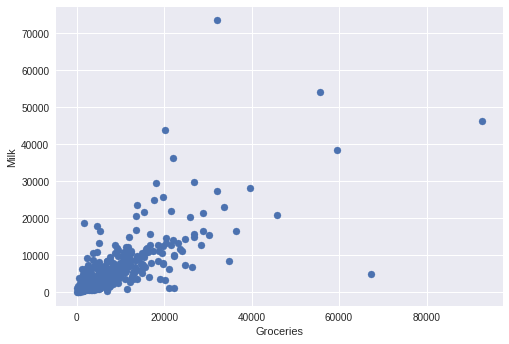

In [38]:
# Let's plot the data now
x = df['Grocery']
y = df['Milk']

plt.scatter(x,y)
plt.xlabel("Groceries")
plt.ylabel("Milk")
plt.show()

Let's brief about the functions that you used for the plotting purpose:
plt.scatter() : This function actually creates the scatter plot based on the data (as parameters that you supply [*x* and *y*]).
plt.xlabel() : It helps you to put a label along the *X-axis*. (*Groceries* in this case)
plt.ylabel() : It helps you to put a label along the *Y-axis*. (*Milk* in this case)
plt.show() : After the plot is created, this function helps you to display it as the output.

You should really explore the beautiful world of *Matplotlib* for all your visualization purposes. Its [documentation](https://matplotlib.org/) is absolutely awesome. 

You can easily spot the data points that are far astray. Right? Well, those are your outliers. 

With DBSCAN, we want to identify this main cluster of customers, but we also want to flag customers with more unusual annual purchasing habits as outliers.

Because the values of the data are in the thousands, you are going to normalize each attribute by scaling it to 0 mean and unit variance. What is does basically is it helps to keep the inter-relationships between the features intact so that a small change in one feature would reflect in the other.

In [0]:
df = df[["Grocery", "Milk"]]
df = df.as_matrix().astype("float32", copy = False)

In [0]:
stscaler = StandardScaler().fit(df)
df = stscaler.transform(df)


You will construct a DBSCAN object that requires a minimum of 15 data points in a neighborhood of radius 0.5 to be considered a core point.

In [0]:
dbsc = DBSCAN(eps = .5, min_samples = 15).fit(df)

Next, we can extract our cluster labels and outliers to plot our results.

In [0]:
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True



![Outlier graph](https://goo.gl/muUZvY)

Lining up with the intuition, the DBSCAN algorithm was able to identify one cluster of customers who are around the mean grocery and mean milk product purchases. In addition, it was able to flag customers whose annual purchasing behavior deviated too heavily from other customers.

Because the outliers corresponded to customers with more extreme purchasing behavior, the wholesale distributor could specifically target these customers with exclusive discounts to encourage larger purchases.

<h3>Real life applications of DBSCAN:</h3>

* Suppose we have an e-commerce and we want to improve our sales by recommending relevant products to our customers. We don’t know exactly what our customers are looking for but based on a data set we can predict and recommend a relevant product to a specific customer. We can apply the DBSCAN to our data set (based on the e-commerce database) and find clusters based on the products that the users have bought. Using this clusters we can find similarities between customers, for example, if customer A has bought a pen, a book and one pair scissors, while customer B purchased a book and one pair of scissors, then you could recommend a pen to customer B.

* Before the rise of deep learning based advanced methodologies, researchers used DBSCAN in order to segregate genes from a genes dataset that had the chance of mediating cancer. 

* Scientists have used DBSCAN in order to detect the stops in the trajectory data generated from mobile GPS devices. Stops represent the most meaningful and most important part of a trajectory.

<h3>Conclusion:</h3>
So, in this blogpost you got to know about the prime disadvantages of centroid-based clustering and got familiar with another family of clustering techniques i.e. density-based clustering. You also saw how they overcome the shortcomings of centroid-based clustering. 

You learnt how DBSCAN works and also did a case study of it. Besides, you got a fair overview of the real life problems where DBSCAN has been incorporated for solving them. As a further reading, I would really recommend you all go through the other density-based clustering methods like *Level Set Tree clustering* and how it is different from DBSCAN.  

<h4>References:</h4>
* Martin Ester, Hans-Peter Kriegel, Jörg Sander, and Xiaowei Xu. 1996. A density-based algorithm for discovering clusters a density-based algorithm for discovering clusters in large spatial databases with noise. In Proceedings of the Second International Conference on Knowledge Discovery and Data Mining (KDD'96), Evangelos Simoudis, Jiawei Han, and Usama Fayyad (Eds.). AAAI Press 226-231.

* https://towardsdatascience.com/how-dbscan-works-and-why-should-i-use-it-443b4a191c80

* https://www.coursera.org/learn/predictive-analytics/lecture/EVHfy/dbscan
